<a href="https://colab.research.google.com/github/b4urock/Covid-19-Data-Analysis/blob/main/Pablo_Pereira_Projeto_M%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

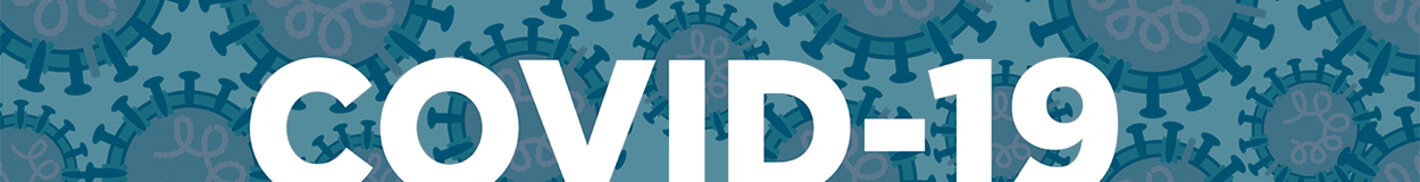

**Análise comparativa do total de óbitos por COVID-19, com a relação às outras causas registradas em cartórios, durante a pandemia de 2020**

Autor: Pablo Pereira
* [Linkedln](https://www.linkedin.com/in/pablo-pereira-3107/)
* [Github](https://github.com/b4urock)

## Objetivo

O objetivo principal desta análise é verificar a hipótese de aumento de óbitos por determinadas causas, durante a pandemia de **COVID-19** no Brasil, que pudessem mascarar as reais quantidades de óbtios causadas pelo vírus **SARS-CoV-2** devido a falta de testagem ampla. 

## Resumo

Durante o processo de análise verificou-se um aumento dos casos de óbitos por **SRAG - Síndrome Respiratória Aguda Grave**, que é a principal causa de morte por COVID-19. Esta síndrome também pode ser causada por vírus e bactérias que promovem o colapso do sistema respiratório, tais como influenza ou pneumonia (viral ou bacteriana). Portando, a análise nos mostra um aumento considerável, em todas as regiões do país, de óbitos por **SRAG** mas não confirmados e segregados dos óbitos por  COVID-19, com comportamento de curva de casos muito semelhente conforme demonstrado no decorrer da análise

Os principais blocos desta análise são:

- Importação dos arquivos de dados do repositório do Brasil.IO
- Equalizando as informações dos Dataframes
- Análise comparativa dos Motivos de òbito
- Análise sobre SRAG - Síndrome Respiratória Aguda Grave - sem causa específica em 2019 e 2020
- Análise de Óbitos por SRAG vs COVID-19
- Conclusão



## Problematização

Seguindo a hipótese levantada, nesta análise serão apuradas as mortes registradas no período de Janeiro de 2020 à Agosto de 2020, comparando também ao mesmo período de 2019 das seguintes causas:

1.   Pneumonia
2.   Insuficiência Respiratória
3.   SRAG - Síndrome Respiratória Aguda Grave, sem causa específica
4.   Indeterminados
5.   Outros Motivos
6.   Septicemia

**Septicemia** foi incluída como possível causa de morte relacionada à COVID-19 , nesta análise, tendo como base este artigo: https://www.fmrp.usp.br/pb/arquivos/4307

Para analisar esta hipótese busquei datasets quantitativos que contenham as causas de morte, no mesmo período da pandemia de COVID-19, com maior atenção a **SRAG - Síndrome Respiratória Aguda Grave**. Apesar da SRAG ser, em sua maioria, a causa do óbito por COVID-19, para efeitos desta análise vou considerar a separação das informações em:

1. **SRAG - Síndrome Respiratória Aguda Grave** - óbitos não confirmados para COVID-19, mas tendo como causa esta síndrome sem causa específica.
2. **COVID-19 (SARS-CoV-2)** - óbitos confirmados com COVID-19 e que podem ter sido causados pela **SRAG** relacionada a este vírus.

Portando, até o final desta análise o termo **SRAG** será tratado como referente ao item 1 e o termo **COVID-19** será utilizado como referência ao item 2.

---

O que estimulou o levantamento desta hipótese foi a divulgação na imprensa, do aumento exponencial de óbitos por **SRGA - Síndrome Respiratória Aguda Grave sem causa aparente.** Como exemplo, a matéria abaixo:

https://g1.globo.com/sp/sao-paulo/noticia/2020/09/09/registros-de-mortes-por-sindrome-respiratoria-sem-causa-especificada-em-sp-em-2020-e-23-vezes-maior-do-que-em-2019.ghtml

Como percebido a Fiocruz, através da plataforma Infogripe(http://info.gripe.fiocruz.br/), já havia detectado este aumento de casos de **SRAG sem causa específica**. Portanto, nesta análise, verificarei esta hipótese com a base de dados do projeto Brasil.io.

**Período apurado:**

Optei por trabalhar com a base de dados D - 60 dias em meses fechados de Janeiro de 2020 à Agosto de 2020 comparando com o mesmo período do ano anterior.
Fiz esta opção pois devido a pandemia, as mortes podem ser registradas em até 60 dias após o óbito nos cartórios civis, conforme publicações abaixo:

https://www.conjur.com.br/2020-mar-31/portaria-permite-sepultamento-cremacao-certidao-obito#:~:text=A%20portaria%20determina%20que%20a,ap%C3%B3s%20a%20data%20da%20morte.

Portaria: https://www.conjur.com.br/dl/portaria-conjunta-altera-procedimentos.pdf

Portando, pode-se ter uma maior variação do número de mortes sendo atualizadas com relação a data atual, o que causaria uma distorção na análise.


## Análise dos dados:

Durante o processo de análise das diferentes fontes de dados disponíveis (Brasil.io, Portal da Transparência e TABNet) optei por utilizar as bases de dados do Brasil.io pois estas já consolidam os dados das secretarias estaduais/municipais de saúde do país quanto aos casos de **COVID-19** e, para o arquivo de Mortes registradas em cartório, totaliza por dia com relação ao período anterior e diferentes causas de óbitos registradas.

Não foi possível a utilização dos dados do site **Portal da transparência**, pois a base de dados disponibilizada armazena somente a última posição apurada das mortes registradas em cartório no dia, e seus respectivos motivos, mas não possui nenhuma coluna de indicação de data no arquivo como pode ser visto no link: https://transparencia.registrocivil.org.br/dados-covid-download

Portando, como o Brasil.io já realiza a consolidação diária dos dados do Portal da Transparência e dados sobre as infecções e mortes por COVID-19, somente as bases de dados deste de site serão utilizadas.

**Os Datasets utilizados foram:**

1.   casos.csv.gz
2.   obito_cartorio.csv.gz


Estes arquivos estão disponíveis em: https://brasil.io/dataset/covid19/files/

O dicionário de dados para estes dois arquivos se encontam-se em: 
https://github.com/turicas/covid19-br/blob/master/api.md#%C3%B3bitos-registrados-em-cart%C3%B3rio

O arquivo **obito_cartorio.csv.gz** também possui os casos de mortes por COVID-19 registrados em cartório mas, como apontado na documentação deste dataset (**deaths_cOVID19: Quantidade de óbitos em decorrência de suspeita ou confirmação de cOVID19 para o estado state acumulados no ano de 2020 (de 1 de janeiro de 2020 a date)**), casos suspeitos também são somados a esta coluna. Por isso descartarei esta informação e as mortes por COVID-19 serão apuradas do arquivo específico consolidado das secretarias de saúde sendo este o **casos.csv.gz** onde consta as mortes confirmadas por COVID-19.



## Montando o Drive do Google Drive para arquivos grandes

In [1]:
#importando arquivos grandes do googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bibliotecas Utilizadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import datetime


**Instalação do plotly** (abaixo) para a criação de gráficos interativos. Todos os gráficos apontados com uma barra de ferramenta no canto superior direito foram gerados com esta biblioteca e permitem interação com o mouse.



In [3]:
pip install plotly==4.12.0

     |████████████████████████████████| 13.1MB 316kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
# Importando Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [5]:
# Configurações de Ambiente
#Visualização de 2 casas decimais definidas a nível de projeto
#pd.options.display.float_format = "{:,.4f}".format


## Carregando os Datasets

In [6]:
# Abaixo os 2 banco de dados que será utilizados

#ds2 - Dataset do projeto Brasil.io com os dados de morte por COVID-19 extraído em 06/11/2020
#Dados encontrados em: https://data.brasil.io/dataset/covid19/caso_full.csv.gz
ds2 = '/content/drive/My Drive/Datasets/AluraBootcamp/Project01/COVID19-BRASILIO-06-11-2020.csv.gz'

#ds3 - Dataset do projeto Brasil.io com as mortes por causas segundo o registrado em cartório para os anos de 2019 e 2020
#Dados encontrados em: https://brasil.io/dataset/covid19/files/obito_cartorio.csv.gz
ds3 = '/content/drive/My Drive/Datasets/AluraBootcamp/Project01/obito_cartorio.csv.gz'


In [7]:
# Lendo os datasets

coviddata  = pd.read_csv(ds2, 
             compression = 'gzip', 
             encoding="ISO-8859-1", 
             parse_dates=['date'],                         
             engine='python',
             sep=",",                              
             thousands=",",
             decimal=".") #casos de COVID19 - Brasil.io

totaldeaths  = pd.read_csv(ds3, 
               compression = 'gzip', 
               encoding="ISO-8859-1", 
               parse_dates=['date'],                         
               engine='python',
               sep=",",                              
               thousands=",",
               decimal=".") #Mortes registradas em cartórios pelo pais Brasil.io                      


# Verificando a importação dos Datasets

## Dados do site Brasil.io sobre as mortes e infecções da COVID-19

In [8]:
coviddata.head(3)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224


**Verificar a necessidade de ajuste do Dataframe devido a informações nulas.**

In [9]:
coviddata.isnull().sum()

date                                  0
state                                 0
city                               6335
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3655
estimated_population               3655
city_ibge_code                     3655
confirmed_per_100k_inhabitants    16982
death_rate                            0
dtype: int64

**Todas as colunas que serão utilizadas deste Daframe estão preenchidas, portando não será necessário nenhum ajuste**

In [10]:
# Verificando a estrutura do DataFrame
coviddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            936870 non-null  datetime64[ns]
 1   state                           936870 non-null  object        
 2   city                            930535 non-null  object        
 3   place_type                      936870 non-null  object        
 4   confirmed                       936870 non-null  int64         
 5   deaths                          936870 non-null  int64         
 6   order_for_place                 936870 non-null  int64         
 7   is_last                         936870 non-null  bool          
 8   estimated_population_2019       933215 non-null  float64       
 9   estimated_population            933215 non-null  float64       
 10  city_ibge_code                  933215 non-null  float64

**Verificando a quantidade de unidades da federação para o último dia do período analisado - Mortes causadas por COVID-19**

In [11]:
coviddata.query('date == "2020-08-31"')['state'].nunique()



27

**Verificando se o último dia do período que será considerado na análise - 31 de Agosto de 2020 - possui informações sobre todos os estados da federação**

In [12]:
coviddata.query('date == "2020-08-31"')['state'].unique()

array(['AC', 'AP', 'AM', 'AL', 'DF', 'CE', 'ES', 'BA', 'MS', 'MA', 'GO',
       'MT', 'PA', 'PB', 'PE', 'PI', 'MG', 'RO', 'RJ', 'RN', 'PR', 'RR',
       'SE', 'SC', 'RS', 'TO', 'SP'], dtype=object)

**Todos os estados, juntamente com o Distrito Federal, possuem informações na data de 31 de Agosto de 2020 para o arquivo casos.csv.gz, como as quantidades são cumulativas dia a dia, podemos prosseguir com a análise**

## Dados do site Brasil.io sobre as mortes e seus motivos registradas em cartório

In [13]:
totaldeaths.head(3)

,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
0,2020-01-01,AC,1,1,0,2,4,3,1,0,0,1,1,7,2,2,0,10,13,NaN,2.0,4.0,3.0,1.0,NaN,NaN,1.0,1.0,7.0,2.0,2.0,NaN,10,13.0
1,2020-01-02,AC,1,1,0,2,10,3,2,0,0,1,1,13,4,4,0,17,23,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,6.0,2.0,2.0,NaN,7,10.0
2,2020-01-03,AC,1,1,0,2,16,3,4,0,0,1,1,21,7,6,0,25,36,NaN,NaN,6.0,NaN,2.0,NaN,NaN,NaN,NaN,8.0,3.0,2.0,NaN,8,13.0


**Verificando a necessidade de ajuste do Dataframe devido a informações nulas.**

In [14]:
totaldeaths.isnull().sum()

date                                      0
state                                     0
epidemiological_week_2019                 0
epidemiological_week_2020                 0
deaths_indeterminate_2019                 0
deaths_respiratory_failure_2019           0
deaths_others_2019                        0
deaths_pneumonia_2019                     0
deaths_septicemia_2019                    0
deaths_sars_2019                          0
deaths_covid19                            0
deaths_indeterminate_2020                 0
deaths_respiratory_failure_2020           0
deaths_others_2020                        0
deaths_pneumonia_2020                     0
deaths_septicemia_2020                    0
deaths_sars_2020                          0
deaths_total_2019                         0
deaths_total_2020                         0
new_deaths_indeterminate_2019          6611
new_deaths_respiratory_failure_2019    1064
new_deaths_others_2019                   53
new_deaths_pneumonia_2019       

**Todas as colunas que serão utilizadas deste Daframe estão preenchidas, portando não será necessário nenhum ajuste**

**Verificando a quantidade de unidades da federação para o último dia do período analisado - Mortes registradas em cartório**

In [15]:
totaldeaths.query('date == "2020-08-31"')['state'].count()

27

**Verificando se o último dia considerado para a análise - 31 de Agosto de 2020 - possui informações sobre todos os estados da federação - Mortes Registradas em Cartório**

In [16]:
totaldeaths.query('date == "2020-08-31"')['state'].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

**Todos os estados, juntamente com o Distrito Federal, possuem informações na data de 31 de Agosto de 2020 para o arquivo obito_cartorio.csv.gz, como as quantidades são cumulativas dia a dia, podemos prosseguir com a análise**

**Verificando a estrutura do DataFrame**

In [17]:
totaldeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 9882 non-null   datetime64[ns]
 1   state                                9882 non-null   object        
 2   epidemiological_week_2019            9882 non-null   int64         
 3   epidemiological_week_2020            9882 non-null   int64         
 4   deaths_indeterminate_2019            9882 non-null   int64         
 5   deaths_respiratory_failure_2019      9882 non-null   int64         
 6   deaths_others_2019                   9882 non-null   int64         
 7   deaths_pneumonia_2019                9882 non-null   int64         
 8   deaths_septicemia_2019               9882 non-null   int64         
 9   deaths_sars_2019                     9882 non-null   int64         
 10  deaths_covid

## Equalizando todos os Dataframes antes da análise.

**Conforme informado no Resumo e Problematização, devido ao prazo de até 60 dias para o registro em cartório dos óbitos durante a pandemia de COVID-19 em 2020, optei por analisar apenas os meses de Janeiro à Agosto de 2020 em relação ao mesmo período de 2019.**

**Como os dados são diários e, nas datas dos arquivos são cumulativos, optei por trabalhar com a data do último dia de cada mês do período apurado, o que revelaria a posição total do mês.**

**Objetos Auxiliares para a classificação e filtragem dos dados**

In [18]:
# Preparando os assets
# Dates List - Datas que serão utilizadas nos DataSets, pegando o últimmo dia de cada mês que contém os dados acumulados do mês
dates = ["2020-01-31","2020-02-29","2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31"]

# Regiões e seus Estados
RegionStates = {#Norte
                'AM': 'Norte',
                'RR': 'Norte',
                'AP': 'Norte',
                'PA': 'Norte',
                'TO': 'Norte',
                'RO': 'Norte',
                'AC': 'Norte',
                #Nordeste
                'MA': 'Nordeste',
                'PI': 'Nordeste',
                'CE': 'Nordeste',
                'RN': 'Nordeste',
                'PE': 'Nordeste',
                'PB': 'Nordeste',
                'SE': 'Nordeste',
                'AL': 'Nordeste',
                'BA': 'Nordeste',
                #Centro-Oeste
                'MT': 'Centro-Oeste',
                'MS': 'Centro-Oeste',
                'GO': 'Centro-Oeste',
                'DF': 'Centro-Oeste',
                #Sudeste
                'SP': 'Sudeste',
                'RJ': 'Sudeste',
                'ES': 'Sudeste',
                'MG': 'Sudeste',
                #Sul
                'PR': 'Sul',
                'RS': 'Sul',
                'SC': 'Sul'
                }

# Listas de Colunas que serão utilizadas para Gerar os Dataframes a serem plotados
col_list_total      = [ 'date',
                        'region',
                        'state',                            
                        'deaths_indeterminate_2019',     
                        'deaths_respiratory_failure_2019',
                        'deaths_others_2019',
                        'deaths_pneumonia_2019',
                        'deaths_septicemia_2019',
                        'deaths_sars_2019',      
                        'deaths_covid19',      
                        'deaths_indeterminate_2020',     
                        'deaths_respiratory_failure_2020',     
                        'deaths_pneumonia_2020', 
                        'deaths_others_2020',
                        'deaths_septicemia_2020',
                        'deaths_sars_2020'] 

**Ajustando o Dataframe com mortes por SARS-CoV-2 (COVID-19)**

In [19]:
# Selecionando os registros do último dia de cada mês. Conforma a documentação do dicionário de dados, a coluna place_type = "state"
# possui a consolidação dos números de todas as cidades correspondente ao estado informado na coluna "state" para a data "date"
dfCOVID =  coviddata.query('date in {} & place_type == "state"'.format(dates)).sort_values(by=['date'], ascending=False).reset_index()

#Conversão da data para string para facilitar a plotagem e mantendo a data anterior para fins de ordenação
dfCOVID['date_orig'] = dfCOVID['date']
dfCOVID['date'] = dfCOVID['date'].dt.strftime("%Y/%b")

#excluindo colunas que não serão utilizadas
dfCOVID = dfCOVID.drop(columns=['city','place_type', 'is_last'])

#Convertendo os valores necessários
dfCOVID['city_ibge_code'] = dfCOVID['city_ibge_code'].astype(int)
dfCOVID['estimated_population_2019'] = dfCOVID['estimated_population_2019'].astype(int)
dfCOVID['estimated_population'] = dfCOVID['estimated_population'].astype(int)

# usado map, para a criação da Coluna region que contém a região ao qual o estado pretence
dfCOVID["region"] = dfCOVID['state'].map(RegionStates)
dfCOVID["region"] = dfCOVID["region"].astype(str)

#Reindexando o Dataframe
dfCOVID = dfCOVID.drop('index', axis=1)

dfCOVID.head(3)

,date,state,confirmed,deaths,order_for_place,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,date_orig,region
0,2020/Aug,AC,24647,612,168,881935,894470,12,2755.48649,0.0248,2020-08-31,Norte
1,2020/Aug,CE,214953,8409,169,9132078,9187103,23,2339.72559,0.0391,2020-08-31,Nordeste
2,2020/Aug,PR,131906,3290,171,11433957,11516840,41,1145.33153,0.0249,2020-08-31,Sul


**Verificando se todas as regiões foram preenchidas no dataframe com dados de COVID-19**

In [20]:
dfCOVID["region"].unique()

array(['Norte', 'Nordeste', 'Sul', 'Centro-Oeste', 'Sudeste'],
      dtype=object)

**Conferindo a estrutura final do Dataframe antes de começar a análise**

In [21]:
dfCOVID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            163 non-null    object        
 1   state                           163 non-null    object        
 2   confirmed                       163 non-null    int64         
 3   deaths                          163 non-null    int64         
 4   order_for_place                 163 non-null    int64         
 5   estimated_population_2019       163 non-null    int64         
 6   estimated_population            163 non-null    int64         
 7   city_ibge_code                  163 non-null    int64         
 8   confirmed_per_100k_inhabitants  163 non-null    float64       
 9   death_rate                      163 non-null    float64       
 10  date_orig                       163 non-null    datetime64[ns]
 11  region

**Ajustando o Dataframe com mortes registradas em cartórios**

In [22]:
dfTotalDeaths =  totaldeaths.query('date in {}'.format(dates)).sort_values(by=['date'], ascending=False)

#Conversão da data para string para facilitar a plotagem e mantendo a data anterior para fins de ordenação
dfTotalDeaths['date_orig'] = dfTotalDeaths['date']
dfTotalDeaths['date']      = dfTotalDeaths['date'].dt.strftime("%Y/%b")

# usado map, para a criação da Coluna region que contém a região ao qual o estado pretence
dfTotalDeaths["region"] = dfTotalDeaths['state'].map(RegionStates)
dfTotalDeaths["region"] = dfTotalDeaths["region"].astype(str)

#Reindexando o Dataframe
dfTotalDeaths = dfTotalDeaths.reset_index()
dfTotalDeaths = dfTotalDeaths.drop('index', axis=1)

dfTotalDeaths.head(3)


,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020,date_orig,region
0,2020/Aug,TO,35,36,38,300,2100,549,353,3,518,33,301,2066,544,372,17,3343,3851,NaN,1.0,15.0,2.0,3.0,NaN,6.0,NaN,1.0,10.0,3.0,1.0,NaN,21,21.0,2020-08-31,Norte
1,2020/Aug,PR,35,36,242,3410,25252,8352,6181,86,4368,293,2994,25636,6478,5604,213,43523,45586,1.0,23.0,124.0,42.0,31.0,NaN,49.0,1.0,17.0,121.0,23.0,19.0,3.0,221,233.0,2020-08-31,Sul
2,2020/Aug,AP,35,36,9,156,922,341,280,3,612,3,180,798,218,192,14,1711,2017,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,7,4.0,2020-08-31,Norte


**Verificando a estrutura do dataframe após o tratamento.**

In [23]:
dfTotalDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 216 non-null    object        
 1   state                                216 non-null    object        
 2   epidemiological_week_2019            216 non-null    int64         
 3   epidemiological_week_2020            216 non-null    int64         
 4   deaths_indeterminate_2019            216 non-null    int64         
 5   deaths_respiratory_failure_2019      216 non-null    int64         
 6   deaths_others_2019                   216 non-null    int64         
 7   deaths_pneumonia_2019                216 non-null    int64         
 8   deaths_septicemia_2019               216 non-null    int64         
 9   deaths_sars_2019                     216 non-null    int64         
 10  deaths_covid19

# Início da Análise Comparativa

**Verificando as mortes causadas por COVID-19 por Região e mês**

In [24]:
# Mortes por COVID-19 por Região e total do mês
dfCOVID.groupby(["region","date_orig"]) ["deaths"].sum().reset_index().sort_values("date_orig", ascending=True)

,region,date_orig,deaths
18,Sudeste,2020-02-29,0
12,Norte,2020-03-31,4
25,Sul,2020-03-31,9
19,Sudeste,2020-03-31,161
6,Nordeste,2020-03-31,23
0,Centro-Oeste,2020-03-31,5
7,Nordeste,2020-04-30,1575
1,Centro-Oeste,2020-04-30,79
13,Norte,2020-04-30,728
20,Sudeste,2020-04-30,3404


Mortes totais por SARS-CoV-2 (COVID-19) até Agosto de 2020, por região

In [25]:
dfCOVID.query('date == "2020/Aug"' ).groupby("region") ["deaths"].sum().reset_index().sort_values("deaths", ascending=False)

,region,deaths
3,Sudeste,54572
1,Nordeste,35155
2,Norte,13526
0,Centro-Oeste,9380
4,Sul,8985


# Plotando os óbitos causados pela COVID-19 por estados e mês

Criando um dataframe específico com a evelução diária da doença por região

In [26]:
# Mortes totais por SARS-CoV-2 (COVID-19) até Agosto de 2020, por região - novo Daframe
regions_covid_evolution = dfCOVID[['region', 'date_orig', 'deaths']].groupby(by=['region','date_orig'], as_index=False).sum()
regions_covid_evolution

,region,date_orig,deaths
0,Centro-Oeste,2020-03-31,5
1,Centro-Oeste,2020-04-30,79
2,Centro-Oeste,2020-05-31,377
3,Centro-Oeste,2020-06-30,1792
4,Centro-Oeste,2020-07-31,5377
5,Centro-Oeste,2020-08-31,9380
6,Nordeste,2020-03-31,23
7,Nordeste,2020-04-30,1575
8,Nordeste,2020-05-31,8912
9,Nordeste,2020-06-30,19339


## Óbitos mensais por COVID-19 em 2020 - Gráfico interativo

In [27]:
#Evolução das mortes por SARS-CoV-2 (COVID-19) por regiões e meses
fig = regions_covid_evolution.plot(
    backend='plotly', x='date_orig', y='deaths', color='region')

fig.layout.title.x=0.5
fig.update_yaxes(range=[0, 55000])

fig.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Óbitos por SARS-CoV-2 (COVID-19) - por mês entre Janeiro à Agosto de 2020 ',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.00,
                yanchor="bottom", xanchor="left", x = 1.02),
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Mês/Ano' },
    autosize = True
)

**A região com o a curva ascendente (mais acentuada) do número de óbitos totais por COVID-19, no final do período analisado, é a região sudeste**

**Criando um dataframe de óbitos totais por região para a COVID-19**

In [28]:
# Preparando o DataFrame por Região e totalizando, também por regiões, as mortes por COVID-19 de Janeiro até Agosto de 2020
dfCOVID_Deaths_Region = dfCOVID.query('date == "2020/Aug"' ).groupby("region") ["deaths"].sum().reset_index().sort_values("deaths", ascending=False)
dfCOVID_Deaths_Region

,region,deaths
3,Sudeste,54572
1,Nordeste,35155
2,Norte,13526
0,Centro-Oeste,9380
4,Sul,8985


**Plotando os dados totais por região**

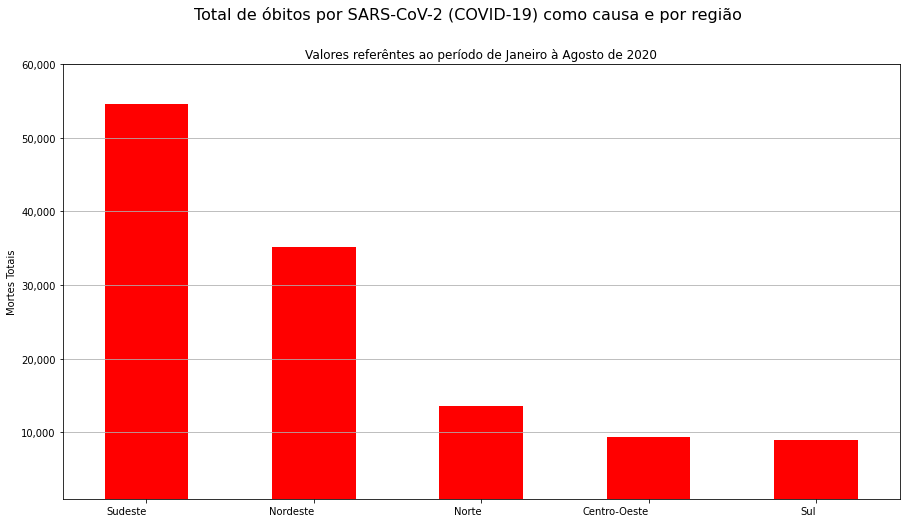

In [29]:
ax = dfCOVID_Deaths_Region.plot(x='region', y='deaths', kind='bar', color='red', figsize=(15,8)) 
ax.set_xticklabels( dfCOVID_Deaths_Region["region"], rotation=0, ha = "right")

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_ylabel("Mortes Totais")
ax.set_xlabel("")
ax.get_legend().remove()

plt.suptitle("Total de óbitos por SARS-CoV-2 (COVID-19) como causa e por região", fontsize=16)
plt.title("Valores referêntes ao período de Janeiro à Agosto de 2020", loc='center')
plt.grid(axis = 'y')
plt.ylim(1000, 60000) 

plt.show()

**A região com o maior número de óbitos por COVID-19, no final do período analisado, é a região sudeste**

**Composição Total do número de óbitos no Brasil, por COVID-19 e por região entre Janeiro à Agosto de 2020 - Gráfico Interativo**

In [30]:
# Gráfico Interativo
fig = px.pie(dfCOVID_Deaths_Region, 
             values='deaths', 
             names='region',  
             title='Composição do total de óbitos por COVID-19 e por região <br>Período: Janeiro à Agosto'
             )
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

**Conforme verificado no gráfico acima a região Sudeste possuiu o maior número de casos de Óbitos por COVID-19 do Brasil, no período analisado.**

# Início da Análise dos óbitos por SRAG - Síndrome Respiratória Aguda Grave sem causa específica

**Óbitos por SRAG - Síndrome Respiratória Aguda Grave - sem causa específica - criação de dataframe para segregar os casos entre Janeiro e Agosto de 2019**

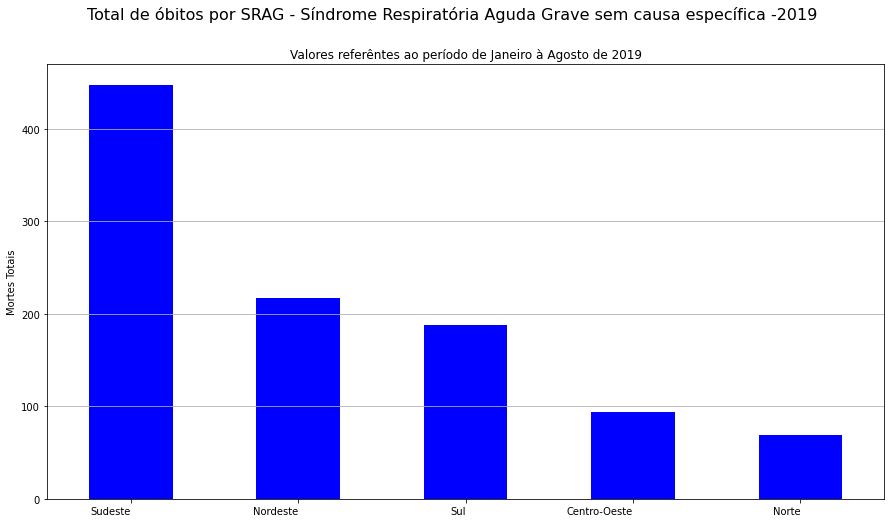

In [31]:
# Preparando o DataFrame e totalizando por regiões as mortes por SRAG - Cumulativo entre Janeiro até Agosto/2019

dfSRAGDeaths_Region_2019 = dfTotalDeaths.query('date == "2020/Aug"' ).groupby("region") ["deaths_sars_2019"].sum().reset_index().sort_values("deaths_sars_2019", ascending=False)

ax = dfSRAGDeaths_Region_2019.plot(x='region', y='deaths_sars_2019', kind='bar', color='blue', figsize=(15,8)) 
ax.set_xticklabels( dfSRAGDeaths_Region_2019["region"], rotation=0, ha = "right")

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_ylabel("Mortes Totais")
ax.set_xlabel("")
ax.get_legend().remove()

plt.suptitle("Total de óbitos por SRAG - Síndrome Respiratória Aguda Grave sem causa específica -2019", fontsize=16)
plt.title("Valores referêntes ao período de Janeiro à Agosto de 2019", loc='center')
plt.grid(axis = 'y')
#plt.ylim(1000, 90000) 

plt.show()

**Óbitos por SRAG - Síndrome Respiratória Aguda Grave - criação de dataframe para segregar os casos entre Janeiro e Agosto de 2020**

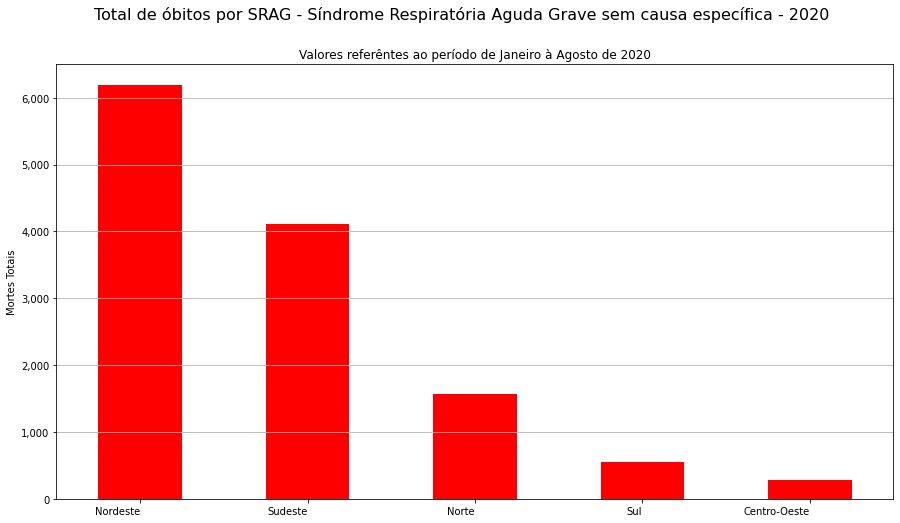

In [32]:
# Preparando o DataFrame e totalizando por regiões as mortes por SRAG - Até Agosto/2020
dfSRAGDeaths_Region_2020 = dfTotalDeaths.query('date == "2020/Aug"' ).groupby("region") ["deaths_sars_2020"].sum().reset_index().sort_values("deaths_sars_2020", ascending=False)

ax = dfSRAGDeaths_Region_2020.plot(x='region', y='deaths_sars_2020', kind='bar',  color='red', figsize=(15,8)) 
ax.set_xticklabels( dfSRAGDeaths_Region_2020["region"], rotation=0, ha = "right")

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_ylabel("Mortes Totais")
ax.set_xlabel("")
ax.get_legend().remove()

plt.suptitle("Total de óbitos por SRAG - Síndrome Respiratória Aguda Grave sem causa específica - 2020", fontsize=16)
plt.title("Valores referêntes ao período de Janeiro à Agosto de 2020", loc='center')
plt.grid(axis = 'y')
#plt.ylim(1000, 90000) 

plt.show()

## Comparação entre óbitos por SRAG nos anos de 2019 e 2020 no período de Janeiro à Agosto

In [33]:
# Plotando o comparativo de mortes por SRAG entre os anos de 2019 e 2020 entre os meses de Janeiro à Agosto de 2020
to_plot = go.Figure(data=[go.Bar(
    name = '2019',
    x=dfSRAGDeaths_Region_2019['region'],
    y=dfSRAGDeaths_Region_2019['deaths_sars_2019']
   ), 
   go.Bar(
    name = '2020',
    x=dfSRAGDeaths_Region_2020['region'],
    y=dfSRAGDeaths_Region_2020['deaths_sars_2020']
   )
])

# Ajustando o Layout
to_plot.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Comparativo do número total de óbitos por SRAG no período de Janeiro à Agosto (2019 e 2020) <br>**Gráfico interativo',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Regiões', 'categoryorder': 'total descending' },
    autosize = True, 
    hovermode = 'x'
)

to_plot.layout.title.x=0.5
to_plot.update_yaxes(range=[0, 6000])
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')
to_plot.show()

***Nota-se um aumento expressivo de óbitos por SRAG - Síndrome Respiratória Aguda Grave (sem causa específica) para o ano de 2020 em todas as regiões do país, em relação ao mesmo período em 2019. Com isso a hipótese sobre o deslocamento de óbitos de COVID-19 para SRAG parece válida. ***

# Análise do total de mortes por todas as demais doenças

**Criação de Dataframe com totais de óbitos por região para todas as demais doenças contidas no dataset analisado.**

In [34]:
# Gerando o DataFrame com o número total de óbitos por causas e por região - Apagar
dfTotalDeaths_Region =  dfTotalDeaths.query('date == "2020/Aug"' ).groupby("region") [col_list_total].sum().reset_index().sort_values("deaths_sars_2019", ascending=False)
dfTotalDeaths_Region

,region,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_pneumonia_2020,deaths_others_2020,deaths_septicemia_2020,deaths_sars_2020
3,Sudeste,2304,32271,214948,85774,60760,448,61148,3729,34098,68443,220480,54953,4108
1,Nordeste,819,16810,105085,27545,27759,217,30012,1208,16347,21994,114591,24932,6196
4,Sul,788,10517,72034,23741,18000,188,10676,824,9236,18570,72619,16368,553
0,Centro-Oeste,265,4220,27271,9967,6032,94,9614,263,4240,8730,28693,5925,274
2,Norte,327,3322,22333,6849,4908,69,9691,332,3853,6897,23848,4715,1568


**Gráfico comparativo sobre óbitos por insuficiência respiratória entre os anos de 2019 e 2020 nos meses de Janeiro à Agosto**

In [35]:
# Plotando o comparativo de óbitos por Insuficiência Respiratória entre os anos de 2019 e 2020 entre os meses de Janeiro à Agosto de 2020
to_plot = go.Figure(data=[go.Bar(
    name = '2019',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_respiratory_failure_2019']
   ), 
   go.Bar(
    name = '2020',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_respiratory_failure_2020']
   )
])

# Ajustando o Layout
to_plot.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Comparativo do número de óbitos por Insuficiência Respiratória no período de Janeiro à Agosto <br>**Gráfico interativo',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Regiões', 'categoryorder': 'total descending' },
    autosize = True, 
    hovermode = 'x'
)

to_plot.layout.title.x=0.5
#to_plot.update_yaxes(range=[0, 800000])
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')
to_plot.show()

***Houve aumento no total de mortes por insuficiência respiratória no período analisado, nas regiões Sudeste, Centro-Oeste e Norte mas pequena redução para as regiões Nordeste e Sul, para esta causa analisada. O leve aumento nas regiões indicadas não suportam a hipótese apresentada . ***

**Gráfico comparativos sobre óbitos por pneumonia entre os anos de 2019 e 2020 nos meses de Janeiro à Agosto**

In [36]:
# Plotando o comparativo de óbitos por Pneumonia entre os anos de 2019 e 2020 entre os meses de Janeiro à Agosto de 2020
to_plot = go.Figure(data=[go.Bar(
    name = '2019',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_pneumonia_2019']
   ), 
   go.Bar(
    name = '2020',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_pneumonia_2020']
   )
])

# Ajustando o Layout
to_plot.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Comparativo do número total de óbitos por pneumonia no período de Janeiro à Agosto <br>**Gráfico interativo',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Regiões', 'categoryorder': 'total descending' },
    autosize = True, 
    hovermode = 'x'
)

to_plot.layout.title.x=0.5
#to_plot.update_yaxes(range=[0, 800000])
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')
to_plot.show()

***Houve redução no total de óbitos por pneumonia no período analisado, em todas as regiões do País e, para esta causa analisada, a hipótese proposta não se valida ***

**Gráfico comparativos sobre óbitos por septicemia entre os anos de 2019 e 2020 nos meses de Janeiro à Agosto**

In [37]:
# Plotando o comparativo de óbitos por Septicemia entre os anos de 2019 e 2020 entre os meses de Janeiro à Agosto de 2020
to_plot = go.Figure(data=[go.Bar(
    name = '2019',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_septicemia_2019']
   ), 
   go.Bar(
    name = '2020',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_septicemia_2020']
   )
])

# Ajustando o Layout
to_plot.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Comparativo do número total de óbitos por Septicemia no período de Janeiro à Agosto <br>**Gráfico interativo',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Regiões', 'categoryorder': 'total descending' },
    autosize = True, 
    hovermode = 'x'
)

to_plot.layout.title.x=0.5
#to_plot.update_yaxes(range=[0, 800000])
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')
to_plot.show()

***Houve redução no total de óbitos por septicemia no período analisado, em todas as regiões do País e, para esta causa analisada, a hipótese proposta não se valida ***

In [38]:
# Plotando o comparativo de óbitos por Septicemia entre os anos de 2019 e 2020 entre os meses de Janeiro à Agosto de 2020
to_plot = go.Figure(data=[go.Bar(
    name = '2019',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_others_2019']
   ), 
   go.Bar(
    name = '2020',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_others_2020']
   )
])

# Ajustando o Layout
to_plot.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Comparativo do número total de óbitos por Outras Causas no período de Janeiro à Agosto <br>**Gráfico interativo',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Regiões', 'categoryorder': 'total descending' },
    autosize = True, 
    hovermode = 'x'
)

to_plot.layout.title.x=0.5
#to_plot.update_yaxes(range=[0, 800000])
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')
to_plot.show()

***Houve leve aumento no total de óbitos por outras causas no período analisado, em todas as regiões do País e, para esta causa analisada, apesar do aumento de óbitos, este não é expressivo para justificar a hipótese que estou avaliando ***

**Gráfico comparativo sobre óbitos por 
causas indeterminadas entre os anos de 2019 e 2020 nos meses de Janeiro à Agosto** 

In [39]:
# Plotando o comparativo de óbitos por causas indeterminadas, entre os anos de 2019 e 2020 entre os meses de Janeiro à Agosto de 2020
to_plot = go.Figure(data=[go.Bar(
    name = '2019',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_indeterminate_2019']
   ), 
   go.Bar(
    name = '2020',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_indeterminate_2020']
   )
])

# Ajustando o Layout
to_plot.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Comparativo do número total de óbitos por Causas Indeterminadas no período de Janeiro à Agosto <br>**Gráfico interativo',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.80,
                yanchor="bottom", xanchor="right", x = 1),
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Regiões', 'categoryorder': 'total descending' },
    autosize = True, 
    hovermode = 'x'
)

to_plot.layout.title.x=0.5

to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')
to_plot.show()

***Houve aumento no total de óbitos por causas indeterminadas no período analisado, nas regiões Sudeste, Nordeste e Sul mas pequena redução para as regiões Norte e Centro-Oeste, para esta causa analisada. O aumento expressivo, na região Sudeste e Nordeste podem justificar a hipótese que estou avaliando sendo que não encontrei nenhum fato relevante que pudesse justificar o aumento do número de óbitos nestas regiões. ***

## Óbitos e suas causas que possuem aumento no número de casos

Para efeito comparativo completo e mais amplo, o Gráfico interativo abaixo realiza a comparação dos seguintes tipos de morte registradas no arquivo de óbitos registrados em cartório:

1.   SRAG - Síndrome Respiratória Aguda Grave sem causa específica
2.   Insuficiência Respiratória
3.   Outros Motivos
4.   Indeterminados

Todos as doenças desta lista possuem aumento no número total de mortes por causa e por região, sendo este aumento em apenas uma ou em todas as regiões do país. 

**As mortes por Pneumonia e Septicemia, a partir deste momento da análise, serão descartadas pois ambas tiveram redução no número total de mortes em todas as regiões do país no período analisado.**




In [40]:
# Plotando o comparativo  do dataset do Brasil.io entre os anos de 2019 e 2020 entre os meses de Janeiro à Agosto de 2020
to_plot = go.Figure(data=[
   go.Bar(
    name = '2019 - SRAG - sem causa específica',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_sars_2019'],
    hovertemplate=
        "<b>2019 - SRAG</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ), 
   go.Bar(
    name = '2020 - SRAG - sem causa específica',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_sars_2020'],
    hovertemplate=
        "<b>2020 - SRAG</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ),                           
   go.Bar(
    name = '2019 - Insuficiência Respiratória',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_respiratory_failure_2019'],
    hovertemplate=
        "<b>2019 - Insuficiência Respiratória</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ), 
   go.Bar(
    name = '2020 - Insuficiência Respiratória',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_respiratory_failure_2020'],
    hovertemplate=
        "<b>2020 - Insuficiência Respiratória</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ),
   go.Bar(
    name = '2019 - Outros',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_others_2019'],
    hovertemplate=
        "<b>2019 - Outros</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ), 
   go.Bar(
    name = '2020 - Outros',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_others_2020'],
    hovertemplate=
        "<b>2020 - Outros</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ),
   go.Bar(
    name = '2019 - Indeterminados',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_indeterminate_2019'],
    hovertemplate=
        "<b>2019 - Indeterminados</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ), 
   go.Bar(
    name = '2020 - Indeterminados',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_indeterminate_2020'],
    hovertemplate=
        "<b>2020 - Indeterminados</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ), 
])

# Ajustando o Layout
to_plot.update_layout(
        template = 'plotly_white',
        title = { 'text': 'Comparativo do total de óbitos por causas que tiveram aumento de volume<br> no período de Janeiro à Agosto (2019 e 2020) <br>**Gráfico interativo',
                  'font': dict(size=20) },
        legend=dict(title='', orientation="v", y=0.30,
                    yanchor="bottom", xanchor="right", x = 1.02),
        yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
        xaxis = { 'title': 'Regiões', 'categoryorder': 'total descending' },
        autosize = True, 
        hovermode = 'closest'
        )

to_plot.layout.title.x=0.5
to_plot.update_yaxes(range=[1, 230000])
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')


to_plot.show()

**Vou comparar os totais de óbitos vs causas plotadas acima com os casos de óbito por COVID-19**

**Análise comparativa de todos os quadros de Mortes que tiveram aumento no período analisado, incluindo COVID-19**

In [41]:
# Plotando o comparativo de mortes por problemas respiratórios entre os anos de 2019 e 2020 entre os meses de Janeiro à Agosto de 2020

to_plot = go.Figure(data=[go.Bar(
    name = '2020 - COVID-19',
    x=dfCOVID_Deaths_Region['region'],
    y=dfCOVID_Deaths_Region['deaths'],
    hovertemplate=
        "<b>2020 - COVID-19</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ),
   go.Bar(
    name = '2019 - SRAG - sem causa específica',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_sars_2019'],
    hovertemplate=
        "<b>2019 - SRAG</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ), 
   go.Bar(
    name = '2020 - SRAG - sem causa específica',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_sars_2020'],
    hovertemplate=
        "<b>2020 - SRAG</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ),
   go.Bar(
    name = '2019 - Insuficiência Respiratória',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_respiratory_failure_2019'],
    hovertemplate=
        "<b>2019 - Insuficiência Respiratória</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ), 
   go.Bar(
    name = '2020 - Insuficiência Respiratória',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_respiratory_failure_2020'],
    hovertemplate=
        "<b>2020 - Insuficiência Respiratória</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ),
   go.Bar(
    name = '2019 - Outras Causas',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_others_2019'],
    hovertemplate=
        "<b>2019 - Outras Causas</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ), 
   go.Bar(
    name = '2020 - Outras Causas',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_others_2020'],
    hovertemplate=
        "<b>2020 - Outras Causas</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ),
   go.Bar(
    name = '2019 - Indeterminadas',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_indeterminate_2019'],
    hovertemplate=
        "<b>2019 - Indeterminadas</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ), 
   go.Bar(
    name = '2020 - Indeterminadas',
    x=dfTotalDeaths_Region['region'],
    y=dfTotalDeaths_Region['deaths_indeterminate_2020'],
    hovertemplate=
        "<b>2020 - Indeterminadas</b><br><br>" +
        "Qtd Mortes: %{y:,.0f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   )
])

# Ajustando o Layout
to_plot.update_layout(
        template = 'plotly_white',
        title = { 'text': 'Comparativo do total de mortes por causa no período de Janeiro à Agosto (2019 e 2020) <br>**Gráfico interativo',
                  'font': dict(size=20) },
        legend=dict(title='', orientation="v", y=0.40,
                    yanchor="bottom", xanchor="right", x = 1.02),
        yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
        xaxis = { 'title': 'Regiões', 'categoryorder': 'total descending' },
        autosize = True, 
        hovermode = 'closest'
        )

to_plot.layout.title.x=0.5
to_plot.update_yaxes(range=[-1000, 250000])
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')

to_plot.show()

**Apesar do total de óbtios por COVID-19 não superar o de outras causas, a velocidade da ascensão da curva de mortes é inegavelmente grave**

**Vou analizar a taxa de crescimento, ano contra ano, para cada uma das causas de óbitos apresentadas no gráfico acima exceto para COVID-19 que não há dados de infecções anteriores a 2020 no Brasil**

In [42]:
# Criando um Dataframe para comparar o Percentual de Crescimento de cada tipo de doença, indeterminada ou outros,
# no mesmo período nos anos de 2019 e 2020
dfTotalDeaths_Region_Ratio = dfTotalDeaths_Region.copy()

dfTotalDeaths_Region_Ratio['deaths_indeterminate_ratio_2019_2020'] = ((dfTotalDeaths_Region_Ratio['deaths_indeterminate_2020']-dfTotalDeaths_Region_Ratio['deaths_indeterminate_2019'])/dfTotalDeaths_Region_Ratio['deaths_indeterminate_2019'])*100
dfTotalDeaths_Region_Ratio['deaths_respiratory_failure_ratio_2019_2020'] = ((dfTotalDeaths_Region_Ratio['deaths_respiratory_failure_2020']-dfTotalDeaths_Region_Ratio['deaths_respiratory_failure_2019'])/dfTotalDeaths_Region_Ratio['deaths_respiratory_failure_2019'])*100
dfTotalDeaths_Region_Ratio['deaths_others_ratio_2019_2020'] = ((dfTotalDeaths_Region_Ratio['deaths_others_2020']-dfTotalDeaths_Region_Ratio['deaths_others_2019'])/dfTotalDeaths_Region_Ratio['deaths_others_2019'])*100
dfTotalDeaths_Region_Ratio['deaths_pneumonia_ratio_2019_2020'] = ((dfTotalDeaths_Region_Ratio['deaths_pneumonia_2020']-dfTotalDeaths_Region_Ratio['deaths_pneumonia_2019'])/dfTotalDeaths_Region_Ratio['deaths_pneumonia_2019'])*100
dfTotalDeaths_Region_Ratio['deaths_sars_ratio_2019_2020'] = ((dfTotalDeaths_Region_Ratio['deaths_sars_2020']-dfTotalDeaths_Region_Ratio['deaths_sars_2019'])/dfTotalDeaths_Region_Ratio['deaths_sars_2019'])*100

dfTotalDeaths_Region_Ratio

,region,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_pneumonia_2020,deaths_others_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_indeterminate_ratio_2019_2020,deaths_respiratory_failure_ratio_2019_2020,deaths_others_ratio_2019_2020,deaths_pneumonia_ratio_2019_2020,deaths_sars_ratio_2019_2020
3,Sudeste,2304,32271,214948,85774,60760,448,61148,3729,34098,68443,220480,54953,4108,61.848958,5.661430,2.573646,-20.205424,816.964286
1,Nordeste,819,16810,105085,27545,27759,217,30012,1208,16347,21994,114591,24932,6196,47.496947,-2.754313,9.046010,-20.152478,2755.299539
4,Sul,788,10517,72034,23741,18000,188,10676,824,9236,18570,72619,16368,553,4.568528,-12.180280,0.812117,-21.780885,194.148936
0,Centro-Oeste,265,4220,27271,9967,6032,94,9614,263,4240,8730,28693,5925,274,-0.754717,0.473934,5.214330,-12.410956,191.489362
2,Norte,327,3322,22333,6849,4908,69,9691,332,3853,6897,23848,4715,1568,1.529052,15.984347,6.783683,0.700832,2172.463768


**Gráfico com o percentual de crescimento de óbitos por causas nos anos de 2019 e 2020 entre os meses de Janeiro à Agosto**

In [43]:
# Plotando o Percentual de crescimento de mortes e suas causas entre os anos de 2019 e 2020 entre os meses de Janeiro à Agosto
to_plot = go.Figure(data=[   
   go.Bar(
    name = 'SRAG - sem causa específica',
    x=dfTotalDeaths_Region_Ratio['region'],
    y=dfTotalDeaths_Region_Ratio['deaths_sars_ratio_2019_2020'],
    hovertemplate=
        "<b>SRAG</b><br><br>" +
        "% Crescimento: %{y:,.4f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ),
   go.Bar(
    name = 'Insuficiência Respiratória',
    x=dfTotalDeaths_Region_Ratio['region'],
    y=dfTotalDeaths_Region_Ratio['deaths_respiratory_failure_ratio_2019_2020'],
    hovertemplate=
        "<b>Insuficiência Respiratória</b><br><br>" +
        "% Crescimento: %{y:,.4f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ),  
   go.Bar(
    name = 'Outras',
    x=dfTotalDeaths_Region_Ratio['region'],
    y=dfTotalDeaths_Region_Ratio['deaths_others_ratio_2019_2020'],
    hovertemplate=
        "<b>Outras</b><br><br>" +
        "% Crescimento: %{y:,.4f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   ),   
   go.Bar(
    name = 'Indeterminadas',
    x=dfTotalDeaths_Region_Ratio['region'],
    y=dfTotalDeaths_Region_Ratio['deaths_indeterminate_ratio_2019_2020'],
    hovertemplate=
        "<b>Indeterminadas</b><br><br>" +
        "% Crescimento: %{y:,.4f}<br>" +
        "Região: %{x}<br>" +
        "<extra></extra>"
   )
])

# Ajustando o Layout
to_plot.update_layout(
        template = 'plotly_white',
        title = { 'text': 'Percentual de Crescimento de óbitos e suas causas, no período de Janeiro à Agosto (2019 e 2020) <br>**Gráfico interativo',
                  'font': dict(size=20) },
        legend=dict(title='', orientation="v", y=0.60,
                    yanchor="bottom", xanchor="right", x = 1.02),
        yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
        xaxis = { 'title': 'Regiões', 'categoryorder': 'total descending' },
        autosize = True, 
        hovermode = 'closest'
        )

to_plot.layout.title.x=0.5
to_plot.update_yaxes(range=[-90, 3000])
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')

to_plot.show()

**Neste gráfico podemos ver claramente que houve uma aumento significativo dos casos de mortes por SRAG - Síndrome Respiratória Aguda Grave (sem causa específica) em todas as regiões do país no período da pandemia de COVID-19 onde não foi encontrado nenhuma ocorrência, fora a própria pandemia, que justificasse este aumento exponencial no número de óbitos por causas. Com isso, a hipótese apresentada pode ser válida para a SRAG**

#Verificar qual estado teve o maior índice de crescimento de óbitos por SRAG - sem causa específica entre os anos de 2019 e 2020 no período de Janeiro à Agosto

**Calculando o Percentual de Crescimento de óbitos por SRGA - sem causa específica entre os anos de 2019 e 2020 no período de Janeiro à Agosto**

In [44]:
dfTotalDeaths['deaths_sars_ratio_2019_2020'] = ((dfTotalDeaths['deaths_sars_2020']-dfTotalDeaths['deaths_sars_2019'])/dfTotalDeaths['deaths_sars_2019'])*100

dfTotalDeaths_SRAG_State_MIN = dfTotalDeaths.query('date_orig == "2020-08-31"').sort_values(by=['deaths_sars_ratio_2019_2020'], ascending=True).reset_index()

dfTotalDeaths_SRAG_State_MIN = dfTotalDeaths_SRAG_State_MIN[['state', 'deaths_sars_2019', 'deaths_sars_2020', 'deaths_sars_ratio_2019_2020']]
dfTotalDeaths_SRAG_State_MIN['region'] = dfTotalDeaths_SRAG_State_MIN['state'].map(RegionStates)


**Tabela Pivot Agrupada por região, estado e percentual de crescimento das óbitos por SRAG - sem causa específica e repectivas quantidades no período de  Janeiro e Agosto dos anos de 2019 e 2020**

In [45]:
table = pd.pivot_table(dfTotalDeaths_SRAG_State_MIN, values=dfTotalDeaths_SRAG_State_MIN[['deaths_sars_2019','deaths_sars_2020','deaths_sars_ratio_2019_2020']], index=['region', 'state'])
table



deaths_sars_2019  ...  deaths_sars_ratio_2019_2020
region       state                    ...                             
Centro-Oeste DF                   22  ...                   150.000000
             GO                   31  ...                   345.161290
             MS                   24  ...                   112.500000
             MT                   17  ...                    76.470588
Nordeste     AL                   10  ...                  2520.000000
             BA                   78  ...                   326.923077
             CE                   29  ...                  1786.206897
             MA                    3  ...                 25433.333333
             PB                   19  ...                  1094.736842
             PE                   33  ...                 11251.515152
             PI                   12  ...                   391.666667
             RN                   16  ...                  1068.750000
             SE                   17  ...                   305.882353
Norte        AC                    3  ...                   500.000000
             AM                   29  ...                  2210.344828
             AP                    3  ...                   366.666667
             PA                   23  ...                  3426.086957
             RO                    5  ...                   380.000000
             RR                    3  ...                   366.666667
             TO                    3  ...                   466.666667
Sudeste      ES                   24  ...                  1000.000000
             MG                  151  ...                   284.105960
             RJ                   74  ...                  1822.972973
             SP                  199  ...                   825.125628
Sul          PR                   86  ...                   147.674419
             RS                   53  ...                   379.245283
             SC                   49  ...                    75.510204

[27 rows x 3 columns]

** Plotando o gráfico de percentual de crescimento**

In [46]:
#Plotando o Gráfico
fig = px.bar(dfTotalDeaths_SRAG_State_MIN,x="state", y="deaths_sars_ratio_2019_2020", 
             labels={"state": "State",  "deaths_sars_ratio_2019_2020": "Increased Death Ratio"},
             template="simple_white")
fig.update_layout(
    xaxis_title_text = 'Estado',
    template = 'plotly_white',
    title = { 'text': 'Percentual do crescimento de casos de SRAG - sem causa específica <br> Valores referêntes aos período de Janeiro à Agosto nos anos de 2019 e 2020', 'xanchor': 'center',
          'yanchor': 'top', 'y': 0.95, 'x': 0.6, 'font': dict(size=20)
           },
    showlegend=False,
    yaxis = { 'title': '% crescimento de óbitos de SRAG', 'categoryorder': 'total descending'},
    autosize = False,
    width = 1000,
    height = 600)

fig.update_yaxes( # the y-axis is in dollars
    showgrid=True
)

fig.update_layout( # customize font and legend orientation & position
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"
    )
)

# Calculo da Média
ypos = dfTotalDeaths_SRAG_State_MIN.deaths_sars_ratio_2019_2020.mean()

fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=ypos, y1=ypos, yref="y"
)

# Anotação
fig.add_annotation( 
    text=(f'Média = {round(dfTotalDeaths_SRAG_State_MIN.deaths_sars_ratio_2019_2020.mean(), 2)}%'), x="MS", y=ypos+800,
    arrowhead=1, showarrow=False, 
    font=dict(
            family="Courier New, monospace",
            size=16
            )
)

fig.show()

**Pode-se verificar que houve um aumento do Percentual de óbitos por SRAG - sem causa específica em todos os estados da federação com o mínimo para o estado de *Santa Catarina com um aumento de 75,5%* e o máximo para o estado do *Maranhão com uma salto de 25.433,33% * **

# Análise de óbitos diários por SRAG - sem causa específica VS óbitos diários  por COVID-19

**Como o aumento do número de óbitos por causa foi exponencialmente maior nos casos de SRAG (sem causa específica), no mesmo período da epidemia de COVID-19 e na faixa analizada, vou comparar as duas curvas de crescimento do número de mortes no mesmo período - Janeiro à Agosto de 2020**

**Criando um dataframe para obitos diários decorrentes da COVID-19**

In [47]:
#Criando um Dataset Para casos de COVID-19 diário
dfCOVID_Daily =  coviddata.query('date >= "2020-01-01" & date <= "2020-08-31" & place_type == "state"').sort_values(by=['date'], ascending=False).reset_index()

#Conversão da data para string para facilitar a plotagem e mantendo a data anterior para fins de ordenação
dfCOVID_Daily['date_orig'] = dfCOVID_Daily['date']
dfCOVID_Daily['date'] = dfCOVID_Daily['date'].dt.strftime("%Y/%b")

#excluindo colunas que não serão utilizadas
dfCOVID_Daily = dfCOVID_Daily.drop(columns=['city','place_type', 'is_last'])

#Convertendo os valores necessários
dfCOVID_Daily['city_ibge_code'] = dfCOVID_Daily['city_ibge_code'].astype(int)
dfCOVID_Daily['estimated_population_2019'] = dfCOVID_Daily['estimated_population_2019'].astype(int)
dfCOVID_Daily['estimated_population'] = dfCOVID_Daily['estimated_population'].astype(int)

# usado map, para a criação da Coluna region que contém a região ao qual o estado pretence
dfCOVID_Daily["region"] = dfCOVID_Daily['state'].map(RegionStates)
dfCOVID_Daily["region"] = dfCOVID_Daily["region"].astype(str)

dfCOVID_Daily.head(3)

,index,date,state,confirmed,deaths,order_for_place,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,date_orig,region
0,66,2020/Aug,AC,24647,612,168,881935,894470,12,2755.48649,0.0248,2020-08-31,Norte
1,215669,2020/Aug,GO,133796,3159,173,7018354,7113540,52,1880.86382,0.0236,2020-08-31,Centro-Oeste
2,76317,2020/Aug,ES,111263,3158,179,4018650,4064052,32,2737.73564,0.0284,2020-08-31,Sudeste


**Criando um dataframe para obitos diários decorrentes da COVID-19 agrupados região**

In [48]:
# Criando um DataFrame Para casos de COVID-19 diário e por região
dfCOVID_Daily_Region = dfCOVID_Daily[['region', 'date_orig', 'deaths']].groupby(by=['region','date_orig'], as_index=False).sum()
dfCOVID_Daily_Region.head(3)

,region,date_orig,deaths
0,Centro-Oeste,2020-03-07,0
1,Centro-Oeste,2020-03-08,0
2,Centro-Oeste,2020-03-09,0


**Verificando a Estrutura do DataFrame Criado**

In [49]:
# Verificando a Estrutura do DataFrame Criado
dfCOVID_Daily_Region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 889
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   region     890 non-null    object        
 1   date_orig  890 non-null    datetime64[ns]
 2   deaths     890 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.8+ KB


**Óbitos diários e por região decorrentes da COVID-19**

In [50]:
#Comparando a Curva de mortes por COVID-19 com a curva de morte por SRAG - sem causa específica
fig = dfCOVID_Daily_Region.plot(kind='bar', backend='plotly', x='date_orig', y='deaths', color='region')

fig.update_layout(
    xaxis_title_text = 'Dia',
    template = 'plotly_white',
    title = { 'text': 'Número de Mortes diárias por Região confirmadas por COVID-19', 'xanchor': 'center',
             'yanchor': 'top', 'y': 0.99, 'x': 0.5, 'font': dict(size=20) },
    legend=dict(title='Regiões', orientation="v", yanchor="bottom", y=0.0,
            xanchor="right", x=1.209),
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    autosize = False,
    width = 1200,
    height = 600
)

fig.show()

**Os "Gaps" apontados no gráfico acima, tal como no dia 18 de Julho de 2020, se referem a dias onde não há registro de informação no Dataset analisado. Mas como informado no início das análises, os dados são cumulativos e atualizados diariamente e, para minha hipótese definida neste notebook, não há influência no resultado final**

**Criando um dataframe com óbitos diários por SRAG - sem causa específica**

In [51]:
# Mortes totais por SRAG - Síndrome Aguda Respiratória acumuladas até Agosto de 2020, por região
dfSRAGDeaths_Daily = totaldeaths.query('date >= "2020-01-01" & date <= "2020-08-31"').sort_values(by=['date'], ascending=False)
dfSRAGDeaths_Daily.head()

,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
9759,2020-08-31,TO,35,36,38,300,2100,549,353,3,518,33,301,2066,544,372,17,3343,3851,NaN,1.0,15.0,2.0,3.0,NaN,6.0,NaN,1.0,10.0,3.0,1.0,NaN,21,21.0
6099,2020-08-31,PI,35,36,44,1245,4649,1734,1112,12,1055,45,1018,4506,1186,881,59,8796,8750,NaN,2.0,18.0,5.0,6.0,NaN,9.0,NaN,7.0,23.0,2.0,2.0,NaN,31,43.0
3537,2020-08-31,MA,35,36,89,1216,8256,1732,1217,3,2331,139,1676,9805,1679,1196,766,12513,17592,1.0,2.0,31.0,6.0,2.0,NaN,3.0,1.0,4.0,34.0,2.0,5.0,NaN,42,49.0
1341,2020-08-31,AP,35,36,9,156,922,341,280,3,612,3,180,798,218,192,14,1711,2017,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,7,4.0
4635,2020-08-31,MT,35,36,25,529,6646,810,597,17,1863,34,466,7340,799,647,30,8624,11179,NaN,4.0,34.0,2.0,1.0,NaN,22.0,1.0,6.0,22.0,4.0,5.0,NaN,41,60.0


**Verificando a estrutura do DataFrame criado**

In [52]:
dfSRAGDeaths_Daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6588 entries, 9759 to 0
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 6588 non-null   datetime64[ns]
 1   state                                6588 non-null   object        
 2   epidemiological_week_2019            6588 non-null   int64         
 3   epidemiological_week_2020            6588 non-null   int64         
 4   deaths_indeterminate_2019            6588 non-null   int64         
 5   deaths_respiratory_failure_2019      6588 non-null   int64         
 6   deaths_others_2019                   6588 non-null   int64         
 7   deaths_pneumonia_2019                6588 non-null   int64         
 8   deaths_septicemia_2019               6588 non-null   int64         
 9   deaths_sars_2019                     6588 non-null   int64         
 10  deaths_covid

**Criando um dataframe para obitos diários decorrentes da SRAG sem causa específica, agrupados região**

In [53]:
# usado map, para a criação da Coluna region que contém a região ao qual o estado pretence
dfSRAGDeaths_Daily["region"] = dfSRAGDeaths_Daily['state'].map(RegionStates)
dfSRAGDeaths_Daily["region"] = dfSRAGDeaths_Daily["region"].astype(str)

#Criando um Dataset Para casos de SRAG - Síndrome Respiratória Aguda Grave -  diário e por região
dfSRAGDeaths_Daily_Region = dfSRAGDeaths_Daily[['region', 'date', 'deaths_sars_2020']].groupby(by=['region','date'], as_index=False).sum()

dfSRAGDeaths_Daily_Region.head(3)



,region,date,deaths_sars_2020
0,Centro-Oeste,2020-01-01,1
1,Centro-Oeste,2020-01-02,2
2,Centro-Oeste,2020-01-03,2


**Plotando o gráfico para casos de SRAG - sem causa específica - diário e por região**

In [54]:
#Comparando a Curva de mortes por COVID-19 com a curva de morte por SRAG - sem causa específica
fig = dfSRAGDeaths_Daily_Region.plot(kind='bar', backend='plotly', x='date', y='deaths_sars_2020', color='region')

fig.update_layout(
    xaxis_title_text = 'Dia',
    template = 'plotly_white',
    title = { 'text': 'Número de óbitos diários por região causados por SRAG - sem causa específica', 'xanchor': 'center',
             'yanchor': 'top', 'y': 0.99, 'x': 0.5, 'font': dict(size=20) },
    legend=dict(title='Regiões', orientation="v", yanchor="bottom", y=0.0,
            xanchor="right", x=1.159),
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    autosize = False,
    width = 1200,
    height = 600
)

fig.show()

**Comparando os óbitos diários por COVID-19 com os óbitos por SRAG - sem causa específica, por dia e região**

In [55]:
#Comparando a Curva de mortes por COVID-19 com a curva de morte por SRAG - sem causa específica
fig = dfCOVID_Daily_Region.plot(kind='bar', backend='plotly', x='date_orig', y='deaths', color='region')

fig.update_layout(
    xaxis_title_text = 'Dia',
    template = 'plotly_white',
    title = { 'text': 'Número de óbitos diários por região - COVID-19', 'xanchor': 'center',
             'yanchor': 'top', 'y': 0.99, 'x': 0.5, 'font': dict(size=20) },
    legend=dict(title='Regiões', orientation="v", yanchor="bottom", y=-1.0,
            xanchor="right", x=1.280),
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    autosize = False,
    width = 1180,
    height = 300
)

fig.show()

fig2 = dfSRAGDeaths_Daily_Region.plot(kind='bar', backend='plotly', x='date', y='deaths_sars_2020', color='region')

fig2.update_layout(
    xaxis_title_text = 'Dia',
    template = 'plotly_white',
    title = { 'text': 'Número de óbitos diários por região - SRAG - sem causa específica', 'xanchor': 'center',
          'yanchor': 'top', 'y': 0.95, 'x': 0.6, 'font': dict(size=20) },
    showlegend=False,
    yaxis = { 'title': 'Mortes', 'categoryorder': 'total descending'},
    autosize = False,
    width = 1000,
    height = 300
)


fig2.show()

# Conclusão

Apesar da enorme diferença em volume **(aproximadamente 100k COVID-19 vs 12k SRAG - sem causa específica** pico do gráfico em Agosto de 2020, comparando o gráfico diário da curva de mortes por de SRAG Síndrome Respiratória Aguda Grave (sem causa específica) e COVID-19 percebe-se grande semelhança entre as datas, desenho da curva e exponencial aumento de casos. O que reforça a hipótese de muitos casos de mortes por COVID-19 terem sido relatados como mortes por SRAG - sem causa específica, devido a falta de testagem. Nota-se também que o início do aumento da curva, para casos de SRAG, se dá por volta do meio do mês de março de 2020. 

Com isso, concluo válida a hipótese deste projeto onde o número de óbitos por **SRAG - sem causa específica**, pode mascarar o total de mortes por **COVID-19**. Além do número de mortes, isso pode significar que o número de casos de **COVID-19** que não levaram ao óbito, também pode ser maior do que o apurado até o momento.